# 误差反向传播法

计算图（Computation Graph） 是深度学习中的一个重要概念，用于表示计算过程。它是一个有向无环图（Directed Acyclic Graph, DAG），其中每个节点表示一个操作或变量，每条边表示操作之间的依赖关系。

<span style="color: red;">**计算图的组成**</span>
1. 节点（Nodes）：
* 变量节点：表示输入数据、权重、偏置等变量。
* 操作节点：表示数学运算（如加法、乘法、激活函数等）。

2. 边（Edges）：
* 表示数据在节点之间的流动和依赖关系。

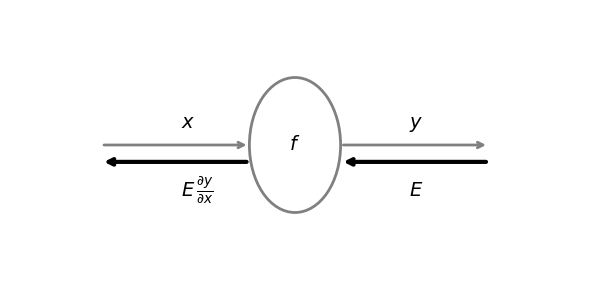

In [271]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 1) 画出代表 f 的圆形节点
    circle_f = Circle((2, 0), radius=0.4, edgecolor='gray', facecolor='white', 
                      linewidth=2, zorder=3)
    ax.add_patch(circle_f)
    ax.text(2, 0, r'$f$', ha='center', va='center', fontsize=14, zorder=4)
    
    # 2) 画 x -> f 的灰色箭头
    #    起点 (0.3, 0), 终点 (1.6, 0) 即从左到圆心左侧
    ax.annotate(
        '', 
        xy=(1.6, 0), 
        xytext=(0.3, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头左端上方标注 x
    ax.text(1, 0.1, r'$x$', fontsize=14, color='black')
    
    # 3) 画 f -> y 的灰色箭头
    #    起点 (2.4, 0), 终点 (3.7, 0) 即从圆心右侧到右端
    ax.annotate(
        '',
        xy=(3.7, 0),
        xytext=(2.4, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头右端上方标注 y
    ax.text(3, 0.1, r'$y$', fontsize=14, color='black')
    
    # 4) 画右侧反向传播的 E（粗黑箭头）
    #    从 (3.7, -0.1) 指向 (2.4, -0.1)
    ax.annotate(
        '',
        xy=(2.4, -0.1),
        xytext=(3.7, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠右处标注 E
    ax.text(3, -0.3, r'$E$', fontsize=14, color='black')
    
    # 5) 画左侧反向传播的 E * dy/dx（粗黑箭头）
    #    从 (1.6, -0.1) 指向 (0.3, -0.1)
    ax.annotate(
        '',
        xy=(0.3, -0.1),
        xytext=(1.6, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠左处标注 E * dy/dx
    ax.text(1, -0.3, r'$E\,\frac{\partial y}{\partial x}$', fontsize=14, color='black')
    
    # 设置坐标范围并去掉坐标轴
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.8, 0.8)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

反向传播的计算顺序是，将信号 $E$ 乘以节点的局部导数$\frac{\partial y}{\partial x}$，然后将结果传递给下一个节点。这里所说的局部导数是指正向传播中$y = f(x)$的导数，也就是$y$关于$x$的导数（$\frac{\partial y}{\partial x}$）。比如，假设$y = f(x) = x^2$ ， 则局部导数为 $\frac{\partial y}{\partial x} = 2x$ 。把这个局部导数乘以上游传过来的值（本例中为E）， 然后传递给前面的节点。

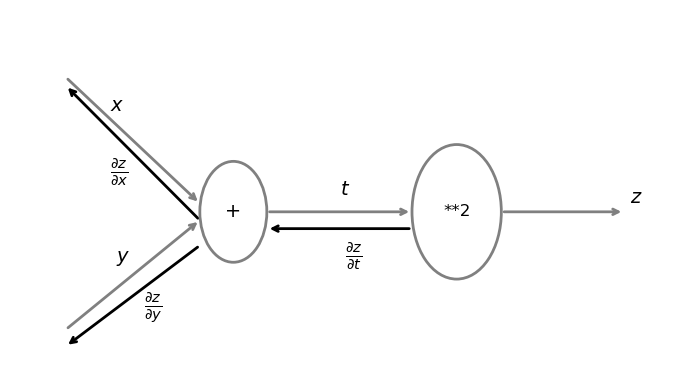

In [106]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # + 节点中心坐标
    plus_center = (2, 1)
    # **2 节点中心坐标
    pow_center  = (4, 1)
    
    # 1) 画加法节点
    circle_plus = Circle(plus_center, radius=0.3, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, '+', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画平方节点
    circle_pow = Circle(pow_center, radius=0.4, edgecolor='gray', 
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_pow)
    ax.text(pow_center[0], pow_center[1], '**2', fontsize=12, 
            ha='center', va='center', zorder=4)
    
    # 3) 画输入 x、y 以及箭头（灰色）
    #    这里将 x 置于 (0.5, 1.8)，y 置于 (1.0, 0.3) 作为示例
    
    # x -> plus
    ax.annotate(
        '', 
        xy=(plus_center[0] - 0.3, plus_center[1] + 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 1.8),                                 # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.9, 1.6, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 0.3),                                # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.95, 0.7, r'$y$', fontsize=14, color='black')
    
    # 4) 画 t -> **2 箭头（灰色）
    ax.annotate(
        '',
        xy=(pow_center[0] - 0.4, pow_center[1]),  # 到平方节点左侧
        xytext=(plus_center[0] + 0.3, plus_center[1]),  # 从加法节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2, plus_center[1]+0.1, r'$t$', 
            fontsize=14, color='black', ha='center')
    
    # 5) 画 **2 -> z 箭头（灰色）
    ax.annotate(
        '',
        xy=(5.5, 1),            # 箭头终点 (右侧)
        xytext=(pow_center[0] + 0.4, pow_center[1]),  # 从平方节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(5.55, 1.05, r'$z$', fontsize=14, color='black')
    
    # 6) 标注偏导（黑色粗箭头或文本）
    #    以下仅示例几条主要的偏导标注，可根据需要加更多
    
    # 偏导 z 对 x
    ax.annotate(
        '',
        xy=(0.5, 1.75),   # 终点
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 起点
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(0.9, 1.2, r'$\frac{\partial z}{\partial x}$', fontsize=15, color='black')
    
    # 偏导 z 对 y
    ax.annotate(
        '',
        xy=(0.5, 0.2),
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.2),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(1.2, 0.4, r'$\frac{\partial z}{\partial y}$', fontsize=15, color='black')
    
    # 偏导 z 对 t
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.3, plus_center[1] - 0.1),
        xytext=(pow_center[0] - 0.4, pow_center[1] - 0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2, plus_center[1] - 0.3, 
            r'$\frac{\partial z}{\partial t}$', fontsize=15, color='black')
    
    # 这里仅示例几处偏导标注，实际可根据你那张图的布局添加更多文字或箭头
    
    # 设置图形范围、去掉坐标轴
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 2.2)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_computational_graph()

$$
\begin{gathered}
z=t^2 \\
t=x+y
\end{gathered}
$$

$$
\frac{\partial z}{\partial x}=\frac{\partial z}{\partial z} \frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}
$$

$$
\frac{\partial z}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=2 t \cdot 1=2(x+y)
$$

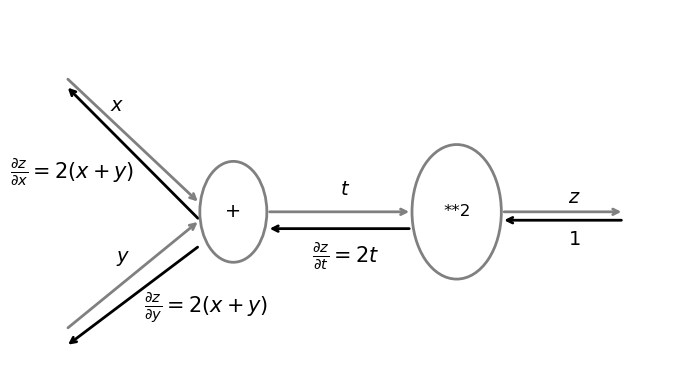

In [148]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(7, 4))
    
    # + 节点中心坐标
    plus_center = (2, 1)
    # **2 节点中心坐标
    pow_center  = (4, 1)
    
    # 1) 画加法节点
    circle_plus = Circle(plus_center, radius=0.3, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, '+', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画平方节点
    circle_pow = Circle(pow_center, radius=0.4, edgecolor='gray', 
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_pow)
    ax.text(pow_center[0], pow_center[1], '**2', fontsize=12, 
            ha='center', va='center', zorder=4)
    
    # 3) 画输入 x、y 以及箭头（灰色）
    #    这里将 x 置于 (0.5, 1.8)，y 置于 (1.0, 0.3) 作为示例
    
    # x -> plus
    ax.annotate(
        '', 
        xy=(plus_center[0] - 0.3, plus_center[1] + 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 1.8),                                 # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.9, 1.6, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 箭头终点（稍微左一点）
        xytext=(0.5, 0.3),                                # 箭头起点
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(0.95, 0.7, r'$y$', fontsize=14, color='black')
    
    # 4) 画 t -> **2 箭头（灰色）
    ax.annotate(
        '',
        xy=(pow_center[0] - 0.4, pow_center[1]),  # 到平方节点左侧
        xytext=(plus_center[0] + 0.3, plus_center[1]),  # 从加法节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2, plus_center[1]+0.1, r'$t$', 
            fontsize=14, color='black', ha='center')
    
    # 5) 画 **2 -> z 箭头（灰色）
    ax.annotate(
        '',
        xy=(5.5, 1),            # 箭头终点 (右侧)
        xytext=(pow_center[0] + 0.4, pow_center[1]),  # 从平方节点右侧
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
        zorder=2
    )
    ax.text(5.0, 1.05, r'$z$', fontsize=14, color='black')
    
    # 6) 标注偏导（黑色粗箭头或文本）
    #    以下仅示例几条主要的偏导标注，可根据需要加更多
    
    # 偏导 z 对 x
    ax.annotate(
        '',
        xy=(0.5, 1.75),   # 终点
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.05),  # 起点
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(0
            , 1.2, r'$\frac{\partial z}{\partial x} = 2(x + y)$', fontsize=15, color='black')
    
    # 偏导 z 对 y
    ax.annotate(
        '',
        xy=(0.5, 0.2),
        xytext=(plus_center[0] - 0.3, plus_center[1] - 0.2),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(1.2, 0.4, r'$\frac{\partial z}{\partial y} = 2(x + y)$', fontsize=15, color='black')
    
    # 偏导 z 对 t
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.3, plus_center[1] - 0.1),
        xytext=(pow_center[0] - 0.4, pow_center[1] - 0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text((plus_center[0]+pow_center[0])/2 - 0.3, plus_center[1] - 0.3, 
            r'$\frac{\partial z}{\partial t} = 2t$', fontsize=15, color='black')

    ax.annotate(
        '',
        xy=(pow_center[0] + 0.4, pow_center[1] - 0.05),            # 箭头终点 (右侧)
        xytext=(5.5, 0.95),  # 从平方节点右侧
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
        zorder=2
    )
    ax.text(5, 0.8, r'$1$', fontsize=14, color='black')
    
    # 设置图形范围、去掉坐标轴
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 2.2)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_computational_graph()

## 输出空间和输入空间

矩阵运算中，输出空间和输入空间的维数由以下三个因素确定：
1. 输入矩阵的形状：决定输入空间的维数。
2. 权重矩阵的形状：权重矩阵的列数决定输出空间的维数。
3. 运算规则：线性变换 $Y = XW + b$ 的结果是由输入矩阵 $X$ 和权重矩阵 $W$ 的形状结合决定的。

具体分析 $Y = XW + b$
1. 输入矩阵 $X$：
* $X$ 的形状为 ($N \times d$)，其中：
* $N$：样本数量（批次大小）。
* $d$：输入特征的维数（输入空间的维数）。
* 每一行对应一个样本，每一列对应一个特征。

2. 权重矩阵 $W$：
* $W$ 的形状为 ($d \times m$)，其中：
* $d$：输入特征的维数，与 $X$ 的列数匹配。
* $m$：输出特征的维数（输出空间的维数）。
* $W$ 的每一列代表一个输出维度的线性组合权重。

3. 输出矩阵 $Y$：
* $Y$ 的形状为 ($N \times m$)，其中：
* $N$：样本数量（与 $X$ 的行数一致）。
* $m$：输出特征的维数（由 $W$ 的列数决定）。

## 反向传播

### 加法节点的反向传播
首先来考虑加法节点的反向传播。这里以$z = x + y$为对象，观察它的反向传播。$z = x + y$的导数可由下式（解析性地）计算出来。

$$
\begin{aligned}
& \frac{\partial z}{\partial x}=1 \\
& \frac{\partial z}{\partial y}=1
\end{aligned}
$$

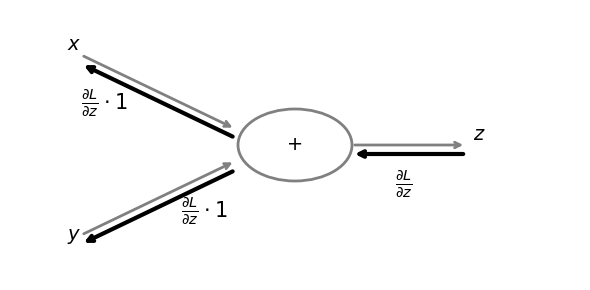

In [179]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_add_node():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 加法节点中心坐标
    plus_center = (2, 0)
    
    # 1) 画加法节点（圆圈内标记“+”）
    circle_plus = Circle(plus_center, radius=0.4, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, '+', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画输入 x、y（灰色箭头）
    #    假设 x 在左上角，y 在左下角
    
    # x -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] + 0.18),  # 箭头终点(接近节点左侧)
        xytext=(0.5, 1.0),                                 # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 x 箭头附近标注 x
    ax.text(0.4, 1.05, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] - 0.18),  # 箭头终点(接近节点左下)
        xytext=(0.5, -1.0),                                # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 y 箭头附近标注 y
    ax.text(0.4, -1.05, r'$y$', fontsize=14, color='black')
    
    # 3) 画加法节点输出 z（灰色箭头）
    ax.annotate(
        '',
        xy=(3.2, 0),                       # 箭头终点(右侧)
        xytext=(plus_center[0] + 0.4, 0),  # 箭头起点(节点右侧)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在箭头右端标注 z
    ax.text(3.25, 0.05, r'$z$', fontsize=14, color='black')
    
    # 4) 画反向传播的梯度 dL/dz (粗黑箭头)
    #    从右向左回传至加法节点
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.4, -0.1),  # 到节点右侧
        xytext=(3.2, -0.1),                # 从输出 z 处
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在箭头右边标注 dL/dz
    ax.text(2.7, -0.5, r'$\frac{\partial L}{\partial z}$', fontsize=15, color='black')
    
    # 5) 画分到 x 分支的梯度 (dL/dz * 1)
    #    假设从节点到左上侧(与 x 同一路径反向)
    ax.annotate(
        '',
        xy=(0.5, 0.9),    # 终点(与x输入箭头类似,可适当错开)
        xytext=(plus_center[0] - 0.42, plus_center[1] + 0.08),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 x 输入处标注 dL/dz * 1
    ax.text(0.5, 0.4, r'$\frac{\partial L}{\partial z}\cdot 1$', fontsize=15, color='black')
    
    # 6) 画分到 y 分支的梯度 (dL/dz * 1)
    ax.annotate(
        '',
        xy=(0.5, -1.1),
        xytext=(plus_center[0] - 0.42, plus_center[1] - 0.28),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 y 输入处标注 dL/dz * 1
    ax.text(1.2, -0.8, r'$\frac{\partial L}{\partial z}\cdot 1$', fontsize=15, color='black')
    
    # 7) 设置坐标范围、去掉坐标轴
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_add_node()

假设有一个简单的网络：

$$
z = a + b \\
L = f(z)
$$

其中  $f$  是某个损失函数。

正向传播：
1. 计算  $z = a + b$
2. 计算  $L = f(z)$ 

反向传播：
1. 计算  $\frac{\partial L}{\partial z} = f{\prime}(z)$
2. 由于  $\frac{\partial z}{\partial a} = 1  和  \frac{\partial z}{\partial b} = 1$ ，因此：

$$
\frac{\partial L}{\partial a} = \frac{\partial L}{\partial z} \cdot 1 = f{\prime}(z) \\
$$
$$
\frac{\partial L}{\partial b} = \frac{\partial L}{\partial z} \cdot 1 = f{\prime}(z)
$$

总结

加法节点在反向传播中的计算图相对简单，因为每个输入的梯度都是相同的（导数为1）。这使得加法操作在梯度传递过程中不会改变梯度的大小，仅仅是将梯度传递到每个输入。这一特性在构建复杂的神经网络时非常有用，因为它简化了梯度计算和传递的过程。

### 乘法节点的反向传播

乘法节点的反向传播。这里我们考虑$z = xy$。

$$
\begin{aligned}
& \frac{\partial z}{\partial x}=y \\
& \frac{\partial z}{\partial y}=x
\end{aligned}
$$

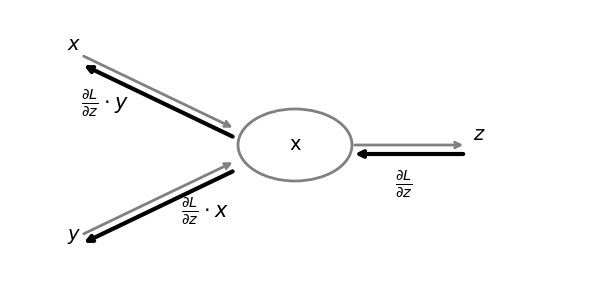

In [195]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_add_node():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 加法节点中心坐标
    plus_center = (2, 0)
    
    # 1) 画加法节点（圆圈内标记“+”）
    circle_plus = Circle(plus_center, radius=0.4, edgecolor='gray', 
                         facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_plus)
    ax.text(*plus_center, 'x', fontsize=14, ha='center', va='center', zorder=4)
    
    # 2) 画输入 x、y（灰色箭头）
    #    假设 x 在左上角，y 在左下角
    
    # x -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] + 0.18),  # 箭头终点(接近节点左侧)
        xytext=(0.5, 1.0),                                 # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 x 箭头附近标注 x
    ax.text(0.4, 1.05, r'$x$', fontsize=14, color='black')
    
    # y -> plus
    ax.annotate(
        '',
        xy=(plus_center[0] - 0.42, plus_center[1] - 0.18),  # 箭头终点(接近节点左下)
        xytext=(0.5, -1.0),                                # 箭头起点(可自行调节)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在 y 箭头附近标注 y
    ax.text(0.4, -1.05, r'$y$', fontsize=14, color='black')
    
    # 3) 画加法节点输出 z（灰色箭头）
    ax.annotate(
        '',
        xy=(3.2, 0),                       # 箭头终点(右侧)
        xytext=(plus_center[0] + 0.4, 0),  # 箭头起点(节点右侧)
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在箭头右端标注 z
    ax.text(3.25, 0.05, r'$z$', fontsize=14, color='black')
    
    # 4) 画反向传播的梯度 dL/dz (粗黑箭头)
    #    从右向左回传至加法节点
    ax.annotate(
        '',
        xy=(plus_center[0] + 0.4, -0.1),  # 到节点右侧
        xytext=(3.2, -0.1),                # 从输出 z 处
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在箭头右边标注 dL/dz
    ax.text(2.7, -0.5, r'$\frac{\partial L}{\partial z}$', fontsize=15, color='black')
    
    # 5) 画分到 x 分支的梯度 (dL/dz * 1)
    #    假设从节点到左上侧(与 x 同一路径反向)
    ax.annotate(
        '',
        xy=(0.5, 0.9),    # 终点(与x输入箭头类似,可适当错开)
        xytext=(plus_center[0] - 0.42, plus_center[1] + 0.08),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 x 输入处标注 dL/dz * y
    ax.text(0.5, 0.4, r'$\frac{\partial L}{\partial z}\cdot y$', fontsize=15, color='black')
    
    # 6) 画分到 y 分支的梯度 (dL/dz * 1)
    ax.annotate(
        '',
        xy=(0.5, -1.1),
        xytext=(plus_center[0] - 0.42, plus_center[1] - 0.28),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3),
    )
    # 在靠近 y 输入处标注 dL/dz * x
    ax.text(1.2, -0.8, r'$\frac{\partial L}{\partial z}\cdot x$', fontsize=15, color='black')
    
    # 7) 设置坐标范围、去掉坐标轴
    ax.set_xlim(0, 4)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_add_node()

假设乘法节点接受  $n$  个输入：

$$
z = x_1 \times x_2 \times \dots \times x_n = \prod_{i=1}^{n} x_i
$$

根据链式法则，损失函数  L  对输入  x_i  的梯度可以表示为：

$$
\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial x_i}
$$

计算  $\frac{\partial z}{\partial x_i} $

由于  $z = \prod_{j=1}^{n} x_j$ ，对  $x_i$  的偏导数为：

$$
\frac{\partial z}{\partial x_i} = \prod_{\substack{j=1 \\ j \neq i}}^{n} x_j = \frac{z}{x_i}
$$

将  $\frac{\partial z}{\partial x_i}$  代入链式法则：

$$
\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial z} \cdot \frac{z}{x_i} = \frac{\partial L}{\partial z} \cdot \prod_{\substack{j=1 \\ j \neq i}}^{n} x_j
$$

或者，利用  $z = \prod_{j=1}^{n} x_j$ ，可以简化为：

$$
\frac{\partial L}{\partial x_i} = \frac{\partial L}{\partial z} \cdot \frac{z}{x_i}
$$

In [201]:
# 定义乘法节点
class MultiplicationNode:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.inputs = [0.0] * num_inputs
        self.output = 0.0
        self.grad_output = 0.0
        self.grad_inputs = [0.0] * num_inputs

    def forward(self, inputs):
        assert len(inputs) == self.num_inputs, "输入数量不匹配"
        self.inputs = inputs
        self.output = 1.0
        for x in inputs:
            self.output *= x
        return self.output

    def backward(self, grad_output):
        self.grad_output = grad_output
        self.grad_inputs = []
        for i in range(self.num_inputs):
            if self.inputs[i] != 0:
                grad = grad_output * (self.output / self.inputs[i])
            else:
                grad = 0.0
            self.grad_inputs.append(grad)
        return self.grad_inputs

# 定义损失函数 L = z
def loss_function(z):
    return z

# 导数 dL/dz = 1
def loss_derivative(z):
    return 1.0

# 示例使用
if __name__ == "__main__":
    # 创建一个有 3 个输入的乘法节点
    num_inputs = 3
    mul_node = MultiplicationNode(num_inputs)

    # 定义输入
    inputs = [2.0, 3.0, 4.0]
    print(f"输入: {inputs}")

    # 前向传播
    z = mul_node.forward(inputs)
    print(f"乘法节点输出 z: {z}")

    # 计算损失
    L = loss_function(z)
    print(f"损失 L: {L}")

    # 反向传播
    dL_dz = loss_derivative(z)
    print(f"dL/dz: {dL_dz}")

    grad_inputs = mul_node.backward(dL_dz)
    for i, grad in enumerate(grad_inputs):
        print(f"dL/dx{i+1}: {grad}")

输入: [2.0, 3.0, 4.0]
乘法节点输出 z: 24.0
损失 L: 24.0
dL/dz: 1.0
dL/dx1: 12.0
dL/dx2: 8.0
dL/dx3: 6.0


## 激活函数层的实现
### ReLU层
激活函数ReLU（Rectified Linear Unit）由下式表示
$$
\begin{aligned}
&y= \begin{cases}x & (x>0) \\ 0 & (x \leqslant 0)\end{cases}\\
\end{aligned}
$$

求出y关于x的导数

$$
\begin{aligned}
&\frac{\partial y}{\partial x}= \begin{cases}1 & (x>0) \\ 0 & (x \leqslant 0)\end{cases}
\end{aligned}
$$

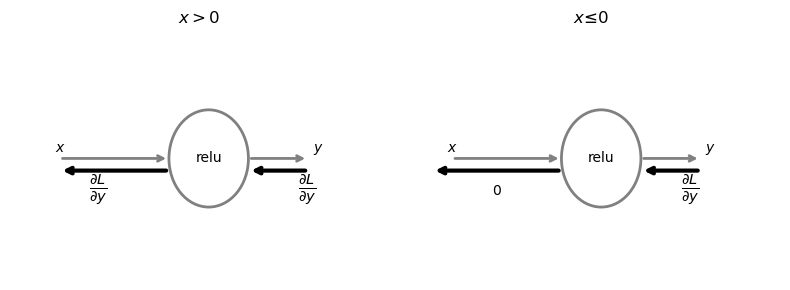

In [266]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_relu_diagram():
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    ##################################################
    # 左图：x > 0
    ##################################################
    ax_left = axes[0]
    # 注意标题中用数学环境 $x > 0$
    ax_left.set_title(r'$x > 0$', fontsize=12, pad=10)

    center_left = (2, 0)  # ReLU 节点的中心坐标

    # 1) 画 ReLU 圆圈
    circle_relu_left = Circle(
        center_left, radius=0.4, edgecolor='gray',
        facecolor='white', linewidth=2
    )
    ax_left.add_patch(circle_relu_left)
    ax_left.text(*center_left, 'relu', ha='center', va='center', fontsize=10)

    # 2) 正向传播箭头: x -> ReLU
    ax_left.annotate(
        '', xy=(1.6, 0), xytext=(0.5, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_left.text(0.45, 0.05, r'$x$', fontsize=10, color='black')

    # 3) 正向传播箭头: ReLU -> y
    ax_left.annotate(
        '', xy=(3.0, 0), xytext=(2.4, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_left.text(3.05, 0.05, r'$y$', fontsize=10, color='black')

    # 4) 反向传播箭头: y -> ReLU （∂L/∂y）
    ax_left.annotate(
        '', xy=(3.0, -0.1), xytext=(2.4, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_left.text(2.9, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=15, color='black')

    # 5) 反向传播箭头: ReLU -> x （∂L/∂y）
    ax_left.annotate(
        '', xy=(1.6, -0.1), xytext=(0.5, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_left.text(0.8, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=15, color='black')

    ax_left.set_xlim(0, 3.8)
    ax_left.set_ylim(-1, 1)
    ax_left.axis('off')

    ##################################################
    # 右图：x <= 0
    ##################################################
    ax_right = axes[1]
    # 这里将 \le 放入数学环境，避免解析出错
    ax_right.set_title(r'$x ≤ 0$', fontsize=12, pad=10)

    center_right = (2, 0)

    # 1) 画 ReLU 圆圈
    circle_relu_right = Circle(
        center_right, radius=0.4, edgecolor='gray',
        facecolor='white', linewidth=2
    )
    ax_right.add_patch(circle_relu_right)
    ax_right.text(*center_right, 'relu', ha='center', va='center', fontsize=10)

    # 2) 正向传播箭头: x -> ReLU
    ax_right.annotate(
        '', xy=(1.6, 0), xytext=(0.5, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_right.text(0.45, 0.05, r'$x$', fontsize=10, color='black')

    # 3) 正向传播箭头: ReLU -> y
    ax_right.annotate(
        '', xy=(3.0, 0), xytext=(2.4, 0),
        arrowprops=dict(arrowstyle='->', color='gray', linewidth=2),
    )
    ax_right.text(3.05, 0.05, r'$y$', fontsize=10, color='black')

    # 4) 反向传播箭头: y -> ReLU （∂L/∂y）
    ax_right.annotate(
        '', xy=(3.0, -0.1), xytext=(2.4, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_right.text(2.8, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=15, color='black')

    # 5) 反向传播箭头: ReLU -> x 为 0
    #    这里仅做一个短箭头示意，或可直接标注“0”
    ax_right.annotate(
        '', xy=(1.6, -0.1), xytext=(0.3, -0.1),
        arrowprops=dict(arrowstyle='<-', color='black', linewidth=3),
    )
    ax_right.text(0.9, -0.3, r'$0$', fontsize=10, color='black')

    ax_right.set_xlim(0, 3.8)
    ax_right.set_ylim(-1, 1)
    ax_right.axis('off')

    plt.tight_layout()
    plt.show()


draw_relu_diagram()

**ReLU层的计算图**

In [206]:
# 定义乘法节点
class MultiplicationNode:
    def __init__(self, num_inputs):
        self.num_inputs = num_inputs
        self.inputs = [0.0] * num_inputs
        self.output = 0.0
        self.grad_output = 0.0
        self.grad_inputs = [0.0] * num_inputs

    def forward(self, inputs):
        assert len(inputs) == self.num_inputs, "输入数量不匹配"
        self.inputs = inputs
        self.output = 1.0
        for x in inputs:
            self.output *= x
        return self.output

    def backward(self, grad_output):
        self.grad_output = grad_output
        self.grad_inputs = []
        for i in range(self.num_inputs):
            if self.inputs[i] != 0:
                grad = grad_output * (self.output / self.inputs[i])
            else:
                grad = 0.0
            self.grad_inputs.append(grad)
        return self.grad_inputs

# 定义 ReLU 层
class ReLULayer:
    def __init__(self):
        self.mask = None

    def forward(self, inputs):
        if isinstance(inputs, list):
            self.mask = [x > 0 for x in inputs]
            return [x if x > 0 else 0.0 for x in inputs]
        else:
            self.mask = inputs > 0
            return inputs if inputs > 0 else 0.0

    def backward(self, grad_output):
        if isinstance(grad_output, list):
            return [go if m else 0.0 for go, m in zip(grad_output, self.mask)]
        else:
            return grad_output if self.mask else 0.0

# 定义损失函数和其导数
def loss_function(outputs):
    """
    计算损失 L = sum(y_i^2)
    :param outputs: 输出列表
    :return: 标量损失
    """
    return sum([y ** 2 for y in outputs])

def loss_derivative(outputs):
    """
    计算损失函数对输出的导数 dL/dy_i = 2 * y_i
    :param outputs: 输出列表
    :return: 导数列表
    """
    return [2 * y for y in outputs]

# 示例使用
if __name__ == "__main__":
    # 创建乘法节点和 ReLU 层
    num_inputs = 3
    mul_node = MultiplicationNode(num_inputs)
    relu = ReLULayer()

    # 测试用例 1：ReLU 输出为 0
    print("=== 测试用例 1：ReLU 输出为 0 ===")
    inputs1 = [2.0, -3.0, 4.0]
    print(f"输入: {inputs1}")

    # 前向传播
    z1 = mul_node.forward(inputs1)
    print(f"乘法节点输出 z: {z1}")

    # 应用 ReLU
    y1 = relu.forward(z1)
    print(f"ReLU 输出 y: {y1}")

    # 计算损失
    L1 = loss_function([y1])
    print(f"损失 L: {L1}")

    # 反向传播
    dL_dy1 = loss_derivative([y1])  # [2 * y]
    print(f"dL/dy: {dL_dy1}")

    # 反向传播 through ReLU
    dL_dz1 = relu.backward(dL_dy1[0])
    print(f"dL/dz: {dL_dz1}")

    # 反向传播 through Multiplication Node
    dL_dx1 = mul_node.backward(dL_dz1)
    for i, grad in enumerate(dL_dx1):
        print(f"dL/dx{i+1}: {grad}")

    # 测试用例 2：ReLU 输出为正值
    print("\n=== 测试用例 2：ReLU 输出为正值 ===")
    inputs2 = [1.0, 3.0, 2.0]
    print(f"输入: {inputs2}")

    # 前向传播
    z2 = mul_node.forward(inputs2)
    print(f"乘法节点输出 z: {z2}")

    # 应用 ReLU
    y2 = relu.forward(z2)
    print(f"ReLU 输出 y: {y2}")

    # 计算损失
    L2 = loss_function([y2])
    print(f"损失 L: {L2}")

    # 反向传播
    dL_dy2 = loss_derivative([y2])  # [2 * y]
    print(f"dL/dy: {dL_dy2}")

    # 反向传播 through ReLU
    dL_dz2 = relu.backward(dL_dy2[0])
    print(f"dL/dz: {dL_dz2}")

    # 反向传播 through Multiplication Node
    dL_dx2 = mul_node.backward(dL_dz2)
    for i, grad in enumerate(dL_dx2):
        print(f"dL/dx{i+1}: {grad}")

=== 测试用例 1：ReLU 输出为 0 ===
输入: [2.0, -3.0, 4.0]
乘法节点输出 z: -24.0
ReLU 输出 y: 0.0
损失 L: 0.0
dL/dy: [0.0]
dL/dz: 0.0
dL/dx1: -0.0
dL/dx2: 0.0
dL/dx3: -0.0

=== 测试用例 2：ReLU 输出为正值 ===
输入: [1.0, 3.0, 2.0]
乘法节点输出 z: 6.0
ReLU 输出 y: 6.0
损失 L: 36.0
dL/dy: [12.0]
dL/dz: 12.0
dL/dx1: 72.0
dL/dx2: 24.0
dL/dx3: 36.0


ReLU层的作用就像电路中的开关一样。正向传播时，有电流通过的话，就将开关设为ON；没有电流通过的话，就将开关设为OFF。 反向传播时，开关为ON的话，电流会直接通过；开关为OFF的话，则不会有电流通过。

### Sigmoid层
sigmoid函数

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

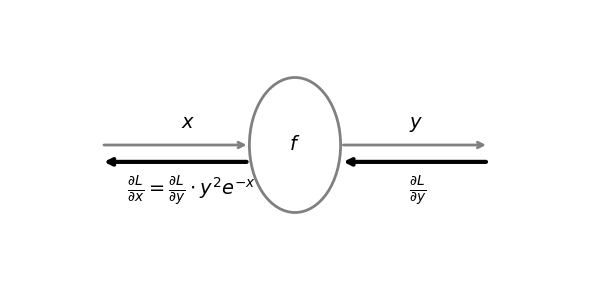

In [283]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_computational_graph():
    fig, ax = plt.subplots(figsize=(6, 3))
    
    # 1) 画出代表 f 的圆形节点
    circle_f = Circle((2, 0), radius=0.4, edgecolor='gray', facecolor='white', 
                      linewidth=2, zorder=3)
    ax.add_patch(circle_f)
    ax.text(2, 0, r'$f$', ha='center', va='center', fontsize=14, zorder=4)
    
    # 2) 画 x -> f 的灰色箭头
    #    起点 (0.3, 0), 终点 (1.6, 0) 即从左到圆心左侧
    ax.annotate(
        '', 
        xy=(1.6, 0), 
        xytext=(0.3, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头左端上方标注 x
    ax.text(1, 0.1, r'$x$', fontsize=14, color='black')
    
    # 3) 画 f -> y 的灰色箭头
    #    起点 (2.4, 0), 终点 (3.7, 0) 即从圆心右侧到右端
    ax.annotate(
        '',
        xy=(3.7, 0),
        xytext=(2.4, 0),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2)
    )
    # 在箭头右端上方标注 y
    ax.text(3, 0.1, r'$y$', fontsize=14, color='black')
    
    # 4) 画右侧反向传播的 E（粗黑箭头）
    #    从 (3.7, -0.1) 指向 (2.4, -0.1)
    ax.annotate(
        '',
        xy=(2.4, -0.1),
        xytext=(3.7, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠右处标注 E
    ax.text(3, -0.3, r'$\frac{\partial L}{\partial y}$', fontsize=14, color='black')
    
    # 5) 画左侧反向传播的 E * dy/dx（粗黑箭头）
    #    从 (1.6, -0.1) 指向 (0.3, -0.1)
    ax.annotate(
        '',
        xy=(0.3, -0.1),
        xytext=(1.6, -0.1),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=3)
    )
    # 在靠左处标注 E * dy/dx
    ax.text(0.5, -0.3, r'$\,\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot y^2 e^{-x}$', fontsize=14, color='black')
    


    # 设置坐标范围并去掉坐标轴
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.8, 0.8)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_computational_graph()

对  $\sigma(x)$  求导：

$$
\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))
$$

推导过程：

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

对  $x$  求导：

$$
\frac{d\sigma(x)}{dx} = \frac{d}{dx} \left( 1 + e^{-x} \right)^{-1}
= -\left( 1 + e^{-x} \right)^{-2} \cdot \frac{d}{dx}(1 + e^{-x})
= \frac{e^{-x}}{(1 + e^{-x})^2}
$$

因为：

$$
\sigma(x) = \frac{1}{1 + e^{-x}} \quad \text{和} \quad 1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}
$$

所以：

$$
\frac{d\sigma(x)}{dx} = \sigma(x)(1 - \sigma(x))
$$

用  $y$  重写导数

注意到：

$$
y = \frac{1}{1 + e^{-x}}, \quad 1 - y = \frac{e^{-x}}{1 + e^{-x}}
$$

因此：

$$
\frac{dy}{dx} = y \cdot (1 - y) = y \cdot \frac{e^{-x}}{1 + e^{-x}} = y^2 e^{-x}
$$


In [295]:
import numpy as np

# Sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid 的反向传播
def sigmoid_backward(dL_dy, y):
    """
    dL_dy: 从后续层传递来的梯度
    y: Sigmoid 层的输出
    """
    return dL_dy * y * (1 - y)

# 示例
x = np.array([0.5, 0.0, -0.5])  # 输入
y = sigmoid(x)                  # 前向传播输出
dL_dy = np.array([0.1, 0.2, 0.3])  # 假设的上游梯度

# 反向传播
dL_dx = sigmoid_backward(dL_dy, y)
print("Gradient w.r.t. input:", dL_dx)

Gradient w.r.t. input: [0.02350037 0.05       0.07050111]


### 上游梯度和下游梯度
在深度学习中的反向传播中，上游梯度和下游梯度的概念通常用来描述在计算图中的梯度传递过程。

<span style="color: red;">**上游梯度**</span>
* 定义：上游梯度是从后续层（靠近损失函数的一侧）传递到当前节点的梯度。
* 来源：上游梯度来自后续节点，是后续节点的输出梯度。
* 在链式法则中，它对应的是  $\frac{\partial L}{\partial y}$ ，即损失对当前层输出的偏导数。

举例

在 Sigmoid 层中：

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

* 上游梯度是  $\frac{\partial L}{\partial y}$ ，它是从下一个层（后续层）传递来的。
* Sigmoid 自己的局部梯度是  $\frac{\partial y}{\partial x}$ 。

<span style="color: red;">**下游梯度**</span>
* 定义：下游梯度是当前节点根据自己的梯度计算规则，传递给前面节点（靠近输入一侧）的梯度。
* 输出：下游梯度是损失函数对当前层输入的偏导数，它会继续传递到前面层。
* 在链式法则中，它对应的是  $\frac{\partial L}{\partial x}$ 。

举例

在 Sigmoid 层中：

$$
\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

* 下游梯度是  $\frac{\partial L}{\partial x}$ ，它会传递到前面的网络部分。

上游梯度通过当前层的局部梯度计算出下游梯度。

具体流程：
1. 获取上游梯度：从后续层传递来的梯度（如 $\frac{\partial L}{\partial y}$）。
2. 计算局部梯度：当前层对输入的偏导数（如 Sigmoid 的 $\frac{\partial y}{\partial x} = y(1-y)$）。
3. 传递下游梯度：结合链式法则计算  $\frac{\partial L}{\partial x}$  并传递给前一层。

前向传播：

$$
x \xrightarrow{\text{层1}} y \xrightarrow{\text{层2}} z \xrightarrow{\text{层3}} L
$$

反向传播：

$$
\frac{\partial L}{\partial L} \rightarrow \frac{\partial L}{\partial z} \rightarrow \frac{\partial L}{\partial y} \rightarrow \frac{\partial L}{\partial x}
$$

* 从后向前，梯度逐层流动，每一层会将自己的梯度计算为“下游梯度”，并作为“上游梯度”传递给前一层。

<span style="color: red;">**举例：全连接层中的梯度传播**</span>

假设一个全连接层，输入为  $x$ ，输出为  $y$ ：

$$
y = Wx + b
$$

反向传播
1. 上游梯度：从后续层传递来的  $\frac{\partial L}{\partial y}$ 。
2. 局部梯度：
    * 对  $x$  的梯度：$\frac{\partial y}{\partial x} = W$。
    * 对  $W$  的梯度：$\frac{\partial y}{\partial W} = x$。
    * 对  $b$  的梯度：$\frac{\partial y}{\partial b} = 1$。
3. 下游梯度：
    * 对  $x ：\frac{\partial L}{\partial x} = \frac{\partial L}{\partial y} \cdot W$。
    * 对  $W ：\frac{\partial L}{\partial W} = x \cdot \frac{\partial L}{\partial y}$。
    * 对  $b ：\frac{\partial L}{\partial b} = \frac{\partial L}{\partial y}$。

## Affine/Softmax层的实现

在神经网络中，Affine层 是一种线性变换层，也被称为全连接层或密集层（Fully Connected Layer, Dense Layer）。它的数学形式通常表示为：

$$
y = XW + b
$$

神经网络的正向传播中进行的矩阵的乘积运算在几何学领域被称为“仿射变换” 。因此，这里将进行仿射变换的处理实现为“Affine层”。

In [6]:
import numpy as np

X = np.random.rand(2)
W = np.random.rand(2,3) # 权重
B = np.random.rand(3)

Y = np.dot(X, W) + B

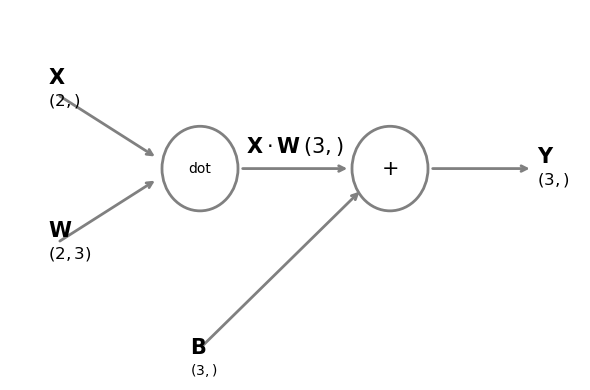

In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_dot_add_graph():
    """
    绘制 x(2,) · W(2,3) -> (3,) 与 B(3,) 做加法 -> Y(3,) 的示意图
    """

    fig, ax = plt.subplots(figsize=(6, 4))

    # 节点坐标
    dot_center = (2.0, 1.5)   # dot节点中心
    add_center = (4.0, 1.5)   # + 节点中心

    # 1) 绘制 dot 节点 (圆圈内写 "dot")
    circle_dot = Circle(dot_center, radius=0.4, edgecolor='gray', 
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_dot)
    ax.text(*dot_center, 'dot', ha='center', va='center', fontsize=10, zorder=4)

    # 2) 绘制 + 节点 (圆圈内写 “+”)
    circle_add = Circle(add_center, radius=0.4, edgecolor='gray',
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_add)
    ax.text(*add_center, '+', ha='center', va='center', fontsize=15, zorder=4)

    # 3) 画 x -> dot (灰色箭头)
    #    x 是 shape (2,)
    #    起点在 (0.5, 2.2)，终点接近 dot 节点左侧
    ax.annotate(
        '', 
        xy=(dot_center[0]-0.45, dot_center[1]+0.1), 
        xytext=(0.5, 2.2),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在箭头附近标注 x, 以及形状 (2,)
    ax.text(0.4, 2.3, r'$\mathbf{X}$', fontsize=15, color='black')
    ax.text(0.4, 2.1, r'$(2,)$', fontsize=12, color='black')

    # 4) 画 W -> dot (灰色箭头)
    #    W 是 shape (2,3)
    #    起点在 (0.5, 0.8)，终点接近 dot 节点左下侧
    ax.annotate(
        '',
        xy=(dot_center[0]-0.45, dot_center[1]-0.1),
        xytext=(0.5, 0.8),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text(0.4, 0.85, r'$\mathbf{W}$', fontsize=15, color='black')
    ax.text(0.4, 0.65, r'$(2,3)$', fontsize=12, color='black')

    # 5) dot -> + (灰色箭头)
    #    dot 输出是 (3,)
    #    从 dot 节点右侧到 add 节点左侧
    ax.annotate(
        '',
        xy=(add_center[0]-0.42, add_center[1]),
        xytext=(dot_center[0]+0.42, dot_center[1]),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text((dot_center[0]+add_center[0])/2, dot_center[1]+0.15, 
            r'$\mathbf{X}\cdot\mathbf{W}\,(3,)$', 
            fontsize=15, ha='center', color='black')

    # 6) 画 B -> + (灰色箭头)
    #    B 是 shape (3,)
    #    起点略低一些，比如 (2.8, -0.2) -> (add_center 左下)
    ax.annotate(
        '',
        xy=(add_center[0]-0.3, add_center[1]-0.2),
        xytext=(2.0, -0.2),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text(1.9, -0.25, r'$\mathbf{B}$', fontsize=15, color='black')
    ax.text(1.9, -0.45, r'$(3,)$', fontsize=10, color='black')

    # 7) + -> Y (灰色箭头)
    #    输出 Y 是 shape (3,)
    #    起点 (add_center右侧)，终点 x坐标更大一些
    ax.annotate(
        '',
        xy=(5.5, add_center[1]),
        xytext=(add_center[0]+0.42, add_center[1]),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text(5.55, add_center[1]+0.05, r'$\mathbf{Y}$', fontsize=15, color='black')
    ax.text(5.55, add_center[1]-0.15, r'$(3,)$', fontsize=12, color='black')

    # 调整坐标范围，并去掉坐标轴
    ax.set_xlim(0, 6)
    ax.set_ylim(-0.5, 3)
    ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_dot_add_graph()

1. 前向传播公式：

$$
Y = XW + b
$$

其中：
* $X$ 是输入矩阵，形状为 ($N \times d$)
* $W$ 是权重矩阵，形状为 ($d \times m$)
* $b$ 是偏置向量，形状为 ($1 \times m$)
* $Y$ 是输出矩阵，形状为 ($N \times m$)

2. 损失函数 $L$：损失 $L$ 是某种标量值函数，依赖于 $Y$。


<span style="color: red;">**梯度推导**</span>

1. $\frac{\partial L}{\partial X}$

* 利用链式法则：

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial X}
$$

* 从前向公式 $Y = XW + b$，得到：

$$
\frac{\partial Y}{\partial X} = W^T
$$

<span style="color: red;">**为什么是转置**</span>



1. 矩阵形式：
对于任意行 i（假设 i 是第 i 个样本），前向公式可以表示为：

$$
Y_i = X_i W
$$

其中：
* $X_i \in \mathbb{R}^{1 \times d}$ 是第 $i$ 行（样本）。
* $Y_i \in \mathbb{R}^{1 \times m}$ 是第 $i$ 行输出。

我们要计算 $X_i$ 对 $Y_i$ 的导数。

**单行视角** 

令 $X[i, :]$ 表示输入矩阵 $X$ 的第 $i$ 行（形状 $1 \times d$），
$Y[i, :]$ 表示输出矩阵 $Y$ 的第 $i$ 行（形状 $1 \times m$）。
根据矩阵乘法，

$$
Y[i, :] \;=\; X[i, :]\,W \quad (\text{忽略偏置 } b),
$$

其中 $X[i, :]$ 的形状为 $1 \times d$，$W$ 的形状为 $d \times m$，因此 $Y[i, :]$ 的形状为 $1 \times m$。

现在只考虑第 $i$ 个样本的情形，我们想要计算

$$
\frac{\partial\,Y[i, :]}{\partial\,X[i, :]}
$$

在标量情形里，如果有 $y = xw（x\in \mathbb{R}^1、w\in \mathbb{R}^1）$，那么

$$
\frac{\partial\,y}{\partial\,x} = w；
$$

当我们把 $y$ 扩展到向量情况（这里 $Y[i, :]$ 是 $1 \times m$ 向量），$w$ 扩展为矩阵 $W$，则结果要用转置“调整”形状，得到

$$
\frac{\partial\,Y[i, :]}{\partial\,X[i, :]}
\;=\;
W^T
$$

这是因为：
* $Y[i, :]$ 是 $1 \times m$ 行向量；
* $X[i, :]$ 是 $1 \times d$ 行向量；
* 线性映射 $\bigl(X[i, :]\,W\bigr)$ 的 Jacobian 矩阵为 $W^T$，形状 $d \times m$。

最后，将所有行（样本）拼起来，也就得到了整体
$\tfrac{\partial Y}{\partial X}$ 的结果为 $W^T$。

**元素级求导视角**

将 $Y[i,j]$ （第 $i$ 个样本的第 $j$ 个输出）写成显式求和：

$$
y_{i,j}=\sum_{k=1}^{d} x_{i,k}\,w_{k,j}
\quad (\text{忽略偏置 } b),
$$

我们想要 $\frac{\partial y_{i,j}}{\partial x_{p,q}}$。有两种情况：
1. $p \neq i$：说明这是不同样本的输入特征，与 $y_{i,j}$ 不相关，导数为 $0$。
2. $p = i$ 且 $q = k$：此时

$$
\frac{\partial y_{i,j}}{\partial x_{i,q}}=\frac{\partial}{\partial x_{i,q}}\Bigl(\sum_{k=1}^d x_{i,k}\,w_{k,j}\Bigr)=w_{q,j}.
$$

所以在对应位置上，$\tfrac{\partial y_{i,j}}{\partial x_{i,q}} = w_{q,j}$。
把这些「小块」拼在一起，恰好是矩阵 W 的转置 W^T，因为行/列在求导时“对调”了。

* 所以：

$$
\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y} \cdot W^T
$$

其中：
* $\frac{\partial L}{\partial Y}$ 是形状为 ($N \times m$)
* $W^T$ 是形状为 ($m \times d$)
* 最终 $\frac{\partial L}{\partial X}$ 形状为 ($N \times d$)。

2. $\frac{\partial L}{\partial W}$

* 利用链式法则：

$$
\frac{\partial L}{\partial W} = \frac{\partial L}{\partial Y} \cdot \frac{\partial Y}{\partial W}
$$

* 从前向公式 $Y = XW + b$，得到：

$$
\frac{\partial Y}{\partial W} = X^T
$$

* 所以：

$$
\frac{\partial L}{\partial W} = X^T \cdot \frac{\partial L}{\partial Y}
$$

其中：
* $X^T$ 是形状为 ($d \times N$)
* $\frac{\partial L}{\partial Y}$ 是形状为 ($N \times m$)
* 最终 $\frac{\partial L}{\partial W}$ 形状为 ($d \times m$)。

3. $\frac{\partial L}{\partial b}$
* 偏置 b 是按行广播的，梯度对 b 的求导可以通过累加得到：

$$
\frac{\partial L}{\partial b} = \sum_{i=1}^N \frac{\partial L}{\partial Y_i}
$$

* 矩阵形式：

$$
\frac{\partial L}{\partial b} = \text{row\_sum}\left(\frac{\partial L}{\partial Y}\right)
$$

其中：
* $\text{row\_sum}$ 表示对每列进行按行求和。
* 结果形状为 ($1 \times m$)。

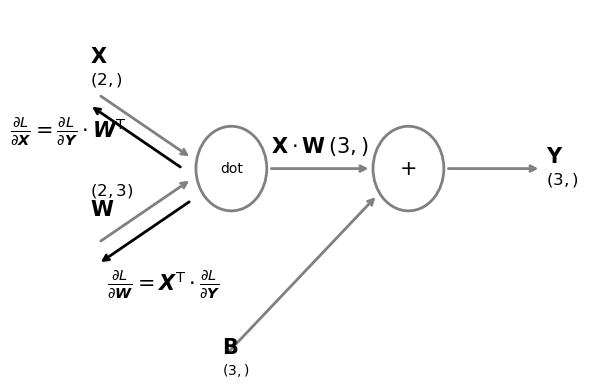

In [97]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_dot_add_graph():
    """
    绘制 x(2,) · W(2,3) -> (3,) 与 B(3,) 做加法 -> Y(3,) 的示意图
    """

    fig, ax = plt.subplots(figsize=(6, 4))

    # 节点坐标
    dot_center = (2.0, 1.5)   # dot节点中心
    add_center = (4.0, 1.5)   # + 节点中心

    # 1) 绘制 dot 节点 (圆圈内写 "dot")
    circle_dot = Circle(dot_center, radius=0.4, edgecolor='gray', 
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_dot)
    ax.text(*dot_center, 'dot', ha='center', va='center', fontsize=10, zorder=4)

    # 2) 绘制 + 节点 (圆圈内写 “+”)
    circle_add = Circle(add_center, radius=0.4, edgecolor='gray',
                        facecolor='white', linewidth=2, zorder=3)
    ax.add_patch(circle_add)
    ax.text(*add_center, '+', ha='center', va='center', fontsize=15, zorder=4)

    # 3) 画 x -> dot (灰色箭头)
    #    x 是 shape (2,)
    #    起点在 (0.5, 2.2)，终点接近 dot 节点左侧
    ax.annotate(
        '', 
        xy=(dot_center[0]-0.45, dot_center[1]+0.1), 
        xytext=(0.5, 2.2),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    # 在箭头附近标注 x, 以及形状 (2,)
    ax.text(0.4, 2.5, r'$\mathbf{X}$', fontsize=15, color='black')
    ax.text(0.4, 2.3, r'$(2,)$', fontsize=12, color='black')
    
    # 3) 画 x -> dot (黑色箭头)
    #    x 是 shape (2,)
    #    起点在 (0.5, 2.2)，终点接近 dot 节点左侧
    ax.annotate(
        '', 
        xy=(0.4, 2.1), 
        xytext=(dot_center[0]-0.55, dot_center[1]),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
    )
    ax.text(-0.5, 1.8, r'$\frac{\partial L}{\partial \boldsymbol{X}}=\frac{\partial L}{\partial \boldsymbol{Y}} \cdot \boldsymbol{W}^{\mathrm{T}}$', fontsize=15, color='black')

    # 4) 画 W -> dot (灰色箭头)
    #    W 是 shape (2,3)
    #    起点在 (0.5, 0.8)，终点接近 dot 节点左下侧
    ax.annotate(
        '',
        xy=(dot_center[0]-0.45, dot_center[1]-0.1),
        xytext=(0.5, 0.8),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text(0.4, 1.05, r'$\mathbf{W}$', fontsize=15, color='black')
    ax.text(0.4, 1.25, r'$(2,3)$', fontsize=12, color='black')

    # 4) 画 W <- dot (灰色箭头)
    #    W 是 shape (2,3)
    #    起点在 (0.5, 0.8)，终点接近 dot 节点左下侧
    ax.annotate(
        '',
        xy=(0.5, 0.6),
        xytext=(dot_center[0]-0.45, dot_center[1]-0.3),
        arrowprops=dict(arrowstyle="->", color='black', linewidth=2),
    )
    ax.text(0.6, 0.35, r'$\frac{\partial L}{\partial \boldsymbol{W}}=\boldsymbol{X}^{\mathrm{T}} \cdot \frac{\partial L}{\partial \boldsymbol{Y}}$', fontsize=15, color='black')
    
    # 5) dot -> + (灰色箭头)
    #    dot 输出是 (3,)
    #    从 dot 节点右侧到 add 节点左侧
    ax.annotate(
        '',
        xy=(add_center[0]-0.42, add_center[1]),
        xytext=(dot_center[0]+0.42, dot_center[1]),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text((dot_center[0]+add_center[0])/2, dot_center[1]+0.15, 
            r'$\mathbf{X}\cdot\mathbf{W}\,(3,)$', 
            fontsize=15, ha='center', color='black')

    # 6) 画 B -> + (灰色箭头)
    #    B 是 shape (3,)
    #    起点略低一些，比如 (2.8, -0.2) -> (add_center 左下)
    ax.annotate(
        '',
        xy=(add_center[0]-0.35, add_center[1]-0.25),
        xytext=(1.95, -0.25),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text(1.9, -0.25, r'$\mathbf{B}$', fontsize=15, color='black')
    ax.text(1.9, -0.45, r'$(3,)$', fontsize=10, color='black')

    # 7) + -> Y (灰色箭头)
    #    输出 Y 是 shape (3,)
    #    起点 (add_center右侧)，终点 x坐标更大一些
    ax.annotate(
        '',
        xy=(5.5, add_center[1]),
        xytext=(add_center[0]+0.42, add_center[1]),
        arrowprops=dict(arrowstyle="->", color='gray', linewidth=2),
    )
    ax.text(5.55, add_center[1]+0.05, r'$\mathbf{Y}$', fontsize=15, color='black')
    ax.text(5.55, add_center[1]-0.15, r'$(3,)$', fontsize=12, color='black')

    # 调整坐标范围，并去掉坐标轴
    ax.set_xlim(0, 6)
    ax.set_ylim(-0.5, 3)
    ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_dot_add_graph()

Aﬃne层的反向传播：注意变量是多维数组。反向传播时各个变量的下方标记了该变量的形状

$$
\begin{gathered}
\frac{\partial L}{\partial \boldsymbol{X}}=\frac{\partial L}{\partial \boldsymbol{Y}} \cdot \boldsymbol{W}^{\mathrm{T}} \\
(N, 2)(N, 3)(3,2)
\end{gathered}
$$


$$
\begin{gathered}
\frac{\partial L}{\partial \boldsymbol{W}}=\boldsymbol{X}^{\mathrm{T}} \cdot \frac{\partial L}{\partial \boldsymbol{Y}} \\
(2,3) \quad(2, N)(N, 3)
\end{gathered}
$$


加上偏置时，需要特别注意。正向传播时，偏置被加到$X·W$的各个 数据上。比如， N = 2（数据为2个）时，偏置会被分别加到这2个数据（各自的计算结果）上，具体的例子如下所示。

In [7]:
import numpy as np
X_dot_W = np.array([[0, 0, 0], [10, 10, 10]])
B = np.array([1, 2, 3])
X_dot_W           

array([[ 0,  0,  0],
       [10, 10, 10]])

In [106]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

正向传播时，偏置会被加到每一个数据（第1个、第2个……）上。因此， 反向传播时，各个数据的反向传播的值需要汇总为偏置的元素。用代码表示的话，如下所示。

In [9]:
dY = np.array([[1, 2, 3,], [4, 5, 6]])
dY

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
dB = np.sum(dY, axis=0)
dB

array([5, 7, 9])

这个例子中，假定数据有2个（N = 2）。偏置的反向传播会对这2个数据 的导数按元素进行求和。因此，这里使用了 np.sum()对第0轴（以数据为单位的轴，axis=0）方向上的元素进行求和。

In [ ]:
# coding: utf-8
import numpy as np
from common.functions import *
from common.util import im2col, col2im


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 权重和偏置参数的导数
        self.dW = None
        self.db = None

    def forward(self, x):
        # 对应张量
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 还原输入数据的形状（对应张量）
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmax的输出
        self.t = None # 监督数据

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 监督数据是one-hot-vector的情况
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # Conv层的情况下为4维，全连接层的情况下为2维  

        # 测试时使用的平均值和方差
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward时使用的中间数据
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx


class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        # 中间数据（backward时使用）
        self.x = None   
        self.col = None
        self.col_W = None
        
        # 权重和偏置参数的梯度
        self.dW = None
        self.db = None

    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        out_h = 1 + int((H + 2*self.pad - FH) / self.stride)
        out_w = 1 + int((W + 2*self.pad - FW) / self.stride)

        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T

        out = np.dot(col, col_W) + self.b
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)

        self.x = x
        self.col = col
        self.col_W = col_W

        return out

    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0,2,3,1).reshape(-1, FN)

        self.db = np.sum(dout, axis=0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)

        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.x.shape, FH, FW, self.stride, self.pad)

        return dx


class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
        self.x = None
        self.arg_max = None

    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + (H - self.pool_h) / self.stride)
        out_w = int(1 + (W - self.pool_w) / self.stride)

        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)
        col = col.reshape(-1, self.pool_h*self.pool_w)

        arg_max = np.argmax(col, axis=1)
        out = np.max(col, axis=1)
        out = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)

        self.x = x
        self.arg_max = arg_max

        return out

    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.pool_h * self.pool_w
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,)) 
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.x.shape, self.pool_h, self.pool_w, self.stride, self.pad)
        
        return dx


### Softmax-with-Loss层

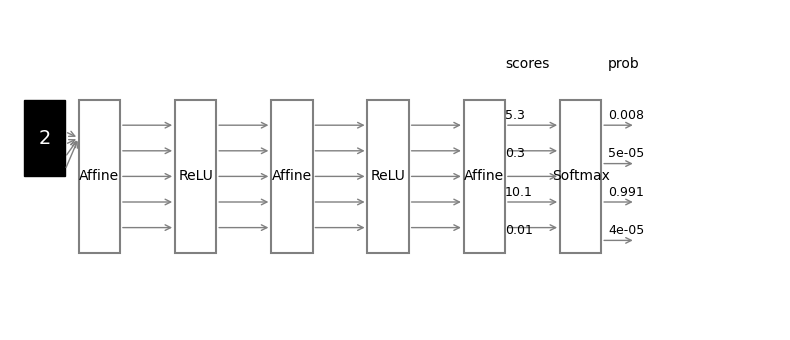

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_mnist_network_diagram():
    fig, ax = plt.subplots(figsize=(8, 3.5))
    
    # 1) 画左侧的手写数字示意框
    #    用一个小方块来代表输入图像，内部写“2”
    img_x, img_y = 0.2, 1.2   # 左下角坐标
    img_w, img_h = 0.6, 0.6   # 图片宽高
    ax.add_patch(patches.Rectangle(
        (img_x, img_y), img_w, img_h,
        edgecolor='black', facecolor='black', zorder=3
    ))
    ax.text(img_x + img_w/2, img_y + img_h/2, '2', 
            ha='center', va='center', color='white', fontsize=14)
    
    # 在图像左侧/下方，画一些虚拟箭头表示多个像素通道
    # （仅作为装饰，略示多输入）
    for yy in [1.25, 1.35, 1.45, 1.55]:
        ax.annotate('', xy=(1.0, 1.5), xytext=(img_x+img_w, yy),
                    arrowprops=dict(arrowstyle="->", color='gray', linewidth=1))
    
    # 2) 依次画若干矩形代表层：Affine -> ReLU -> Affine -> ReLU -> Affine -> Softmax
    #    每个层是一个竖直的矩形，依次排开
    layer_names = ['Affine', 'ReLU', 'Affine', 'ReLU', 'Affine', 'Softmax']
    layer_x_start = 1.0
    layer_width = 0.6
    layer_height = 1.2
    
    # 在最右边，我们要展示“得分” -> “概率”两列文字
    # 这里先定义在 Softmax 右侧对齐的坐标
    score_start_x = layer_x_start + 5*(layer_width + 0.8) + 1.2  # 在第5层以后再空出一些位置
    
    for i, layer_name in enumerate(layer_names):
        rect_x = layer_x_start + i*(layer_width + 0.8)
        rect_y = 0.6
        # 画层的矩形
        ax.add_patch(patches.Rectangle(
            (rect_x, rect_y), layer_width, layer_height,
            edgecolor='gray', facecolor='white', linewidth=1.5, zorder=2
        ))
        # 在矩形中央写层名称
        ax.text(rect_x + layer_width/2, rect_y + layer_height/2, layer_name,
                ha='center', va='center', fontsize=10, zorder=3)
        
        # 画上一层到这一层之间的一些连线 (仅示意)
        if i == 0:
            # 这层是第一个 Affine，从左侧像素输入到 Affine
            # 我们上面已经画了几条灰线指向 (1.0, 1.5)，此处可再画若干条到 Affine 矩形左
            pass
        else:
            # 在当前层与前一层之间画若干连线
            prev_rect_x = layer_x_start + (i-1)*(layer_width + 0.8)
            # 取若干从前层矩形右侧到当前层左侧的小箭头
            for yy in [0.8, 1.0, 1.2, 1.4, 1.6]:
                ax.annotate('', 
                            xy=(rect_x, yy), 
                            xytext=(prev_rect_x+layer_width, yy),
                            arrowprops=dict(arrowstyle="->", color='gray', linewidth=1))
    
    # 3) 画最右侧的得分与概率示意
    #    在最后一个矩形 (Softmax) 右侧，画若干灰线到右边不同的文本 (得分 or 概率)
    last_layer_rect_x = layer_x_start + 5*(layer_width + 0.8)
    for j, (score_val, prob_val) in enumerate([(5.3, 0.008), (0.3, 0.00005), 
                                               (10.1, 0.991), (0.01, 0.00004)]):
        # 从 Softmax 的右边到文字
        yy = 1.6 - j*0.3  # 让它们分布在竖直方向
        # 箭头
        ax.annotate('', 
                    xy=(score_start_x - 0.1, yy), 
                    xytext=(last_layer_rect_x + layer_width, yy),
                    arrowprops=dict(arrowstyle="->", color='gray', linewidth=1))
        # 在箭头终点处标注数值 (得分 / 概率)
        ax.text(score_start_x - 2, yy+0.05, f'{score_val}', fontsize=9, color='black')
        ax.text(score_start_x-0.5, yy+0.05, f'{prob_val}', fontsize=9, color='black')
    
    # 4) 在最右边再加上列标签：得分  概率
    ax.text(score_start_x-2, 2.05, 'scores', fontsize=10, color='black', ha='left')
    ax.text(score_start_x-0.5, 2.05, 'prob', fontsize=10, color='black', ha='left')
    
    # 设置坐标范围并去掉坐标轴
    ax.set_xlim(0, score_start_x+2.0)
    ax.set_ylim(0, 2.5)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_mnist_network_diagram()

Softmax层将输入值正规化 （将再输出。另外，因为手写数字识别要进行10类分类，所以向Softmax层的输 入也有10个。

原始定义中：

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

如果 $\{z_i\}$ 中包含较大的数值，如 $z_{\text{max}} = \max_j z_j$ 很大，那么 $e^{z_i}$ 可能会数值溢出。为防止溢出，我们可以对输入进行平移，即从每个 $z_i$ 中减去最大值 $z_{\text{max}}$：

$$
\text{softmax}(z_i) = \frac{e^{z_i - z_{\max}}}{\sum_{j=1}^{K} e^{z_j - z_{\max}}}.
$$

因为 $\forall j, z_j - z_{\max} \leq 0$，这样就避免了指数项出现过于巨大的情况。


神经网络的 **推理阶段** 和 **学习阶段** 是两个重要的阶段

1. 推理阶段 (Inference Phase)：推理阶段是指将已经训练好的神经网络模型应用于实际数据，以进行预测、分类或其他任务的过程。这是神经网络在部署后的运行阶段。

2. 学习阶段 (Training Phase)：学习阶段是指通过不断优化模型参数（权重和偏置）以提高预测精度的过程。通常会基于训练数据和目标函数（如损失函数）进行优化。

神经网络的推理通常不使用Softmax层，这是因为在多分类任务中，最终的类别预测只依赖于logits的相对大小，而 Softmax不会改变logits的排序。

神经网络中未被正规化的输出结果（图5-28中Softmax层前面的Affine层的输出）有时被称为“得分”。也就是说，当神经网络的推理只需要给出一个答案 的情况下，因为此时只对得分最大值感兴趣，所以不需要Softmax层。不过，神经网络的学习阶段则需要Softmax层。

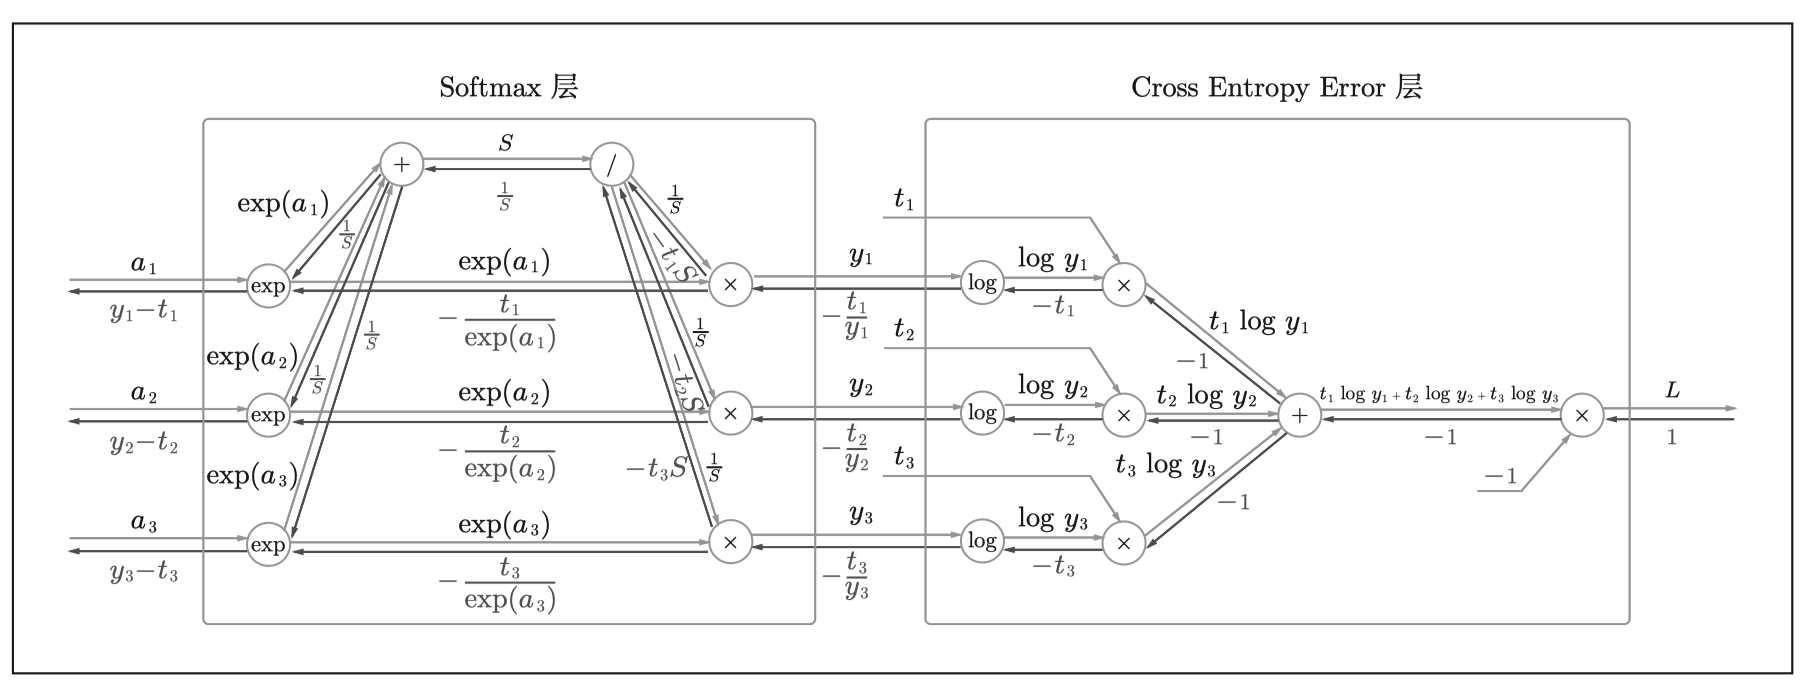

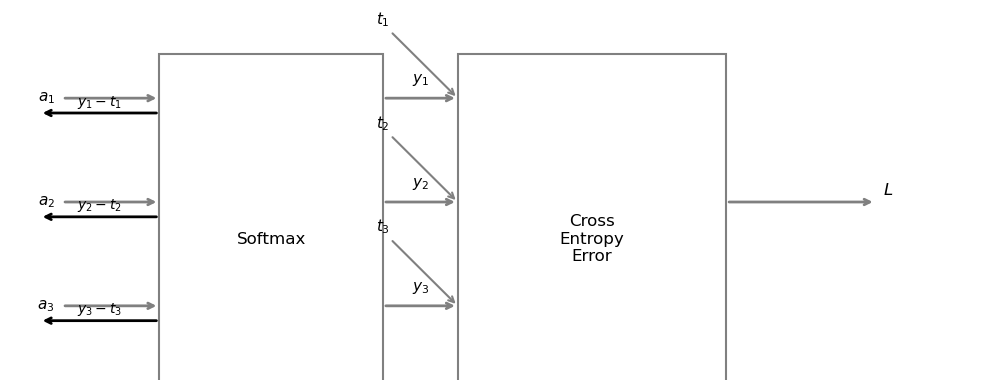

In [67]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_softmax_ce_diagram():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('off')  # 去除坐标轴
    
    # ---------------------
    # 1) 画 Softmax 大矩形
    # ---------------------
    softmax_x, softmax_y = 1.0, 0.5   # Softmax左下角坐标
    softmax_w, softmax_h = 1.5, 2.5   # 宽、高
    ax.add_patch(Rectangle(
        (softmax_x, softmax_y), softmax_w, softmax_h,
        edgecolor='gray', facecolor='none', linewidth=1.5
    ))
    ax.text(softmax_x + softmax_w/2, softmax_y + softmax_h/2, 
            "Softmax", fontsize=12, ha='center', va='center')
    
    # ---------------------
    # 2) 画 Cross Entropy 大矩形
    # ---------------------
    ce_x = 3.0  # Cross Entropy 左下角X
    ce_y = 0.5
    ce_w, ce_h = 1.8, 2.5
    ax.add_patch(Rectangle(
        (ce_x, ce_y), ce_w, ce_h,
        edgecolor='gray', facecolor='none', linewidth=1.5
    ))
    ax.text(ce_x + ce_w/2, ce_y + ce_h/2, 
            "Cross\nEntropy\nError", fontsize=12, ha='center', va='center')
    
    # ---------------------
    # 3) 左侧 a1, a2, a3 -> Softmax
    # ---------------------
    # 假设它们的纵坐标分别分布在 y=[2.7, 2.0, 1.3]，对应 a1,a2,a3
    a_positions = [2.7, 2.0, 1.3]
    for i, ay in enumerate(a_positions, start=1):
        # 写 a_i
        ax.text(0.3, ay, fr"$a_{i}$", fontsize=11, ha='right', va='center')
        # 箭头： a_i -> Softmax 左侧
        ax.annotate(
            "",
            xy=(softmax_x, ay),
            xytext=(0.35, ay),
            arrowprops=dict(arrowstyle="->", linewidth=2, color='gray')
        )
    
    # ---------------------
    # 4) Softmax -> Cross Entropy  (y1, y2, y3)
    # ---------------------
    # 与 a_positions 对应
    for i, ay in enumerate(a_positions, start=1):
        # Softmax 右侧x
        sm_right_x = softmax_x + softmax_w
        # CE 左侧 x
        ce_left_x = ce_x
        
        # 箭头： Softmax -> CE
        ax.annotate(
            "",
            xy=(ce_left_x, ay),
            xytext=(sm_right_x, ay),
            arrowprops=dict(arrowstyle="->", linewidth=2, color='gray')
        )
        # 标注 y_i
        ax.text((ce_left_x + sm_right_x)/2, ay+0.1, fr"$y_{i}$", 
                fontsize=11, color='black', ha='center')
    
    # ---------------------
    # 5) 上方 t1, t2, t3 -> Cross Entropy
    # ---------------------
    # 可以让它们在更靠上处, 以斜线箭头指向CE
    # 对应于 y1,y2,y3 的行
    t_offsets = [0.3, 0.2, 0.1]  # 只是让它们稍微分开
    for i, ay in enumerate(a_positions, start=1):
        tx = ce_x - 0.5
        ty = ay + 0.5  # 高一点
        ax.text(tx, ty, fr"$t_{i}$", fontsize=11, ha='center')
        # 箭头: t_i -> CE
        ax.annotate(
            "",
            xy=(ce_x, ay),
            xytext=(tx + 0.05, ty - 0.05),
            arrowprops=dict(arrowstyle="->", linewidth=1.5, color='gray')
        )
    
    # ---------------------
    # 6) 输出 L (Cross Entropy Error -> Right)
    # ---------------------
    # 在CE右侧某个中部位置 (ce_x+ce_w, 2.0) -> out
    out_y = 2.0
    ax.annotate(
        "",
        xy=(ce_x+ce_w+1.0, out_y),
        xytext=(ce_x+ce_w, out_y),
        arrowprops=dict(arrowstyle="->", linewidth=2, color='gray')
    )
    ax.text(ce_x+ce_w+1.05, out_y+0.05, r"$L$", fontsize=12)
    
    # ---------------------
    # 7) 反向传播 (y_i - t_i)  (显示在Softmax左侧)
    # ---------------------
    # 假定每个通道在Softmax的左侧，用粗箭头向左
    # 也就是 a_i 的下方再画一条, 并标 "y_i - t_i"
    # 让其终点是 (0.2, ay - 0.1), 起点是 (softmax_x, ay - 0.1), 反向
    for i, ay in enumerate(a_positions, start=1):
        back_y = ay - 0.1
        ax.annotate(
            "",
            xy=(0.2, back_y),
            xytext=(softmax_x, back_y),
            arrowprops=dict(arrowstyle="->", linewidth=2, color='black')
        )
        ax.text((0.2+softmax_x)/2, back_y+0.05, fr"$y_{i} - t_{i}$", 
                fontsize=10, color='black', ha='center')
    
    # 调整可视范围
    ax.set_xlim(0, 6.5)
    ax.set_ylim(0.8, 3.2)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    draw_softmax_ce_diagram()

在进行分类任务时，通常会将模型的输出 $\mathbf{y}$（通过 Softmax 得到的类别概率）与目标标签 $\mathbf{t}$（“one‐hot”或相应的分布）一起，用交叉熵损失（Cross Entropy Error）来衡量模型预测与真实答案的差异。这里的 $\mathbf{t}$ 就是目标标签向量，例如对于三分类问题：

$$
\mathbf{t} = \bigl(t_1,\, t_2,\, t_3\bigr)
$$

其中 $t_i$ 表示目标在第 $i$ 类上的 “真实”分布（在 one-hot 情形下，某个 $t_j=1$，其余 $t_i=0$）。

<span style="color: red;">**Softmax与交叉熵公式**</span>

1. Softmax
对于原始输出 $\mathbf{a} = (a_1,a_2,\dots,a_n)$，Softmax 定义为

$$
y_j = \frac{\exp(a_j)}{\sum_{k=1}^n \exp(a_k)}.
$$

2. 交叉熵损失（Cross Entropy Error）
令 $\mathbf{y} = (y_1,y_2,\dots,y_n)$ 为模型输出的概率分布，$\mathbf{t} = (t_1,t_2,\dots,t_n)$ 为目标分布（通常是 one-hot）。交叉熵损失

$$
L = -\sum_{j=1}^n t_j \log y_j.
$$
    

（A）先求 $\frac{\partial L}{\partial y_j}$

从 $L = -\sum_{j=1}^n t_j \log y_j$ 出发，对 $y_j$ 求偏导数：

$$
\frac{\partial L}{\partial y_j}
= -\sum_{k=1}^n t_k \,\frac{\partial}{\partial y_j} \bigl[\log y_k\bigr]
= -\, t_j \,\frac{1}{y_j}.
$$

其他项 $k \neq j$ 对 $y_j$ 的导数为 $0$，因此只留下 $k=j$ 一项。

因此

$$
\frac{\partial L}{\partial y_j} = -\, \frac{t_j}{y_j}.
$$

（B）再求 $\frac{\partial y_j}{\partial a_i}$

因为 $y_j = \frac{\exp(a_j)}{\sum_{k=1}^n \exp(a_k)}$ 可视为函数 $y_j(\mathbf{a})$，我们分别讨论 $i=j$ 与 $i \neq j$：

1. 当 $i = j$ 时

$$
y_j = \frac{\exp(a_j)}{\sum_{k=1}^n \exp(a_k)},
$$

对 $a_j$ 求导数（用商法则或更常见的“Softmax 已知结论”）可得

$$
\frac{\partial y_j}{\partial a_j}
= y_j \,\bigl(1 - y_j\bigr).
$$


2. 当 $i \neq j$ 时
类似地，可以得到

$$
\frac{\partial y_j}{\partial a_i}
= -\,y_j\,y_i,
\quad \text{(for } i \neq j\text{)}.
$$

因为增加 $a_i$ 会使 $\exp(a_i)$ 变大，导致分母变大，从而让 $y_j$ 变小，但其变化量与 $y_j\cdot y_i$ 成正比。

（C）合并使用链式法则：$\frac{\partial L}{\partial a_i}$

由链式法则

$$
\frac{\partial L}{\partial a_i}
= \sum_{j=1}^n
\frac{\partial L}{\partial y_j}
\cdot
\frac{\partial y_j}{\partial a_i}.
$$

令我们将 $\frac{\partial L}{\partial y_j} = -\, \frac{t_j}{y_j}$ 与上面 $\frac{\partial y_j}{\partial a_i}$ 合并。

* 当 $i=j$ 时
$$
\left.\frac{\partial L}{\partial a_i}\right|{i=j}
= \sum{j=1}^n \bigl(-\,\frac{t_j}{y_j}\bigr)\bigl(\frac{\partial y_j}{\partial a_i}\bigr)
$$

在此只保留 $j=i$ 项，其他项 $j\neq i$ 中 $\partial y_j / \partial a_i$ 虽然不零，但会在下一步合并写法中体现。这一步最直接写展开更清楚：

$$
\frac{\partial L}{\partial a_i}
= -\,\frac{t_i}{y_i} \,\frac{\partial y_i}{\partial a_i}
\;+\;\sum_{j\neq i}
\Bigl(-\,\frac{t_j}{y_j}\Bigr)
\Bigl(\frac{\partial y_j}{\partial a_i}\Bigr).
$$

代入具体形式：
* $\frac{\partial y_i}{\partial a_i} = y_i (1-y_i)$,
* $\frac{\partial y_j}{\partial a_i} = -\, y_j\, y_i \quad(\text{for } j \neq i)$,

得
$$
\frac{\partial L}{\partial a_i}
= -\,\frac{t_i}{y_i}\bigl[y_i(1-y_i)\bigr]
\;+\;\sum_{j\neq i} \Bigl(-\,\frac{t_j}{y_j}\Bigr)\bigl[-\,y_j\,y_i\bigr].
$$

整理后：
$$
\frac{\partial L}{\partial a_i}
= -\,t_i \bigl(1-y_i\bigr)
\;+\;\sum_{j\neq i} t_j\, y_i.
$$
因为 $-t_i(1-y_i)$ 里含有 $-t_i$ 与 $+t_i y_i$，以及 $\sum_{j\neq i} t_j\,y_i = y_i\sum_{j\neq i} t_j$；最后还要注意到 $\sum_{j=1}^n t_j = 1$（若 $\mathbf{t}$ 是 one-hot 或概率分布）和 $\sum_{j=1}^n y_j = 1$。在这种情形下做进一步合并会得出非常简洁的形式$y_i - t_i$。

广为人知的结果：

$$
\frac{\partial L}{\partial a_i}
= y_i - t_i.
$$

当将 Softmax 与交叉熵结合使用时，可以直接求出从输出层（Softmax 输出 $\mathbf{y}$）到损失 L 的梯度。结论是对每个分量有

$$
\frac{\partial L}{\partial a_i} = y_i - t_i.
$$

也就是Softmax 层的反向传播，如果紧接着是交叉熵损失，其梯度恰好是

$$
(y_1 - t_1,\; y_2 - t_2,\; y_3 - t_3).
$$

要点：
1. $t_i$ 表示目标标签：在多分类问题中，通常是 one-hot 向量，也可以是更一般的概率分布，用于表示真实类别。
2. $y_i$ 表示模型输出的概率：这是由 Softmax 将原始打分 $\mathbf{a}$ 映射成的各类概率值。
3. 梯度 $\mathbf{y} - \mathbf{t}$ 直接出现在反向传播中，因而在实现时可以非常简洁地将输出层误差写成“$y_i - t_i$”。

再举一个例子，比如思考目标标签是$(0, 1, 0)$， Softmax层的输出是$(0.01, 0.99, 0)$的情形（这个神经网络识别得相当准确）。此时Softmax层的反向传播 传递的是$(0.01, −0.01, 0)$这样一个小的误差。这个小的误差也会向前面的层 传播，因为误差很小，所以Softmax层前面的层学到的内容也很“小”。

## 误差反向传播法的实现

前提：神经网络中有合适的权重和偏置，调整权重和偏置以便拟合训练数据的 过程称为学习。神经网络的学习分为下面4个步骤。

步骤1（mini-batch）：从训练数据中随机选择一部分数据。

步骤2（计算梯度）：计算损失函数关于各个权重参数的梯度。

步骤3（更新参数）：将权重参数沿梯度方向进行微小的更新。

步骤4（重复）：重复步骤1、步骤2、步骤3。